In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
PATH = 'detected_faces'
CSV_FACES_PATH = 'detected_faces_annotations_all.csv'  # for to determine whether it is a face or not
CSV_PATH = 'adv_detected_faces_annotations.csv'
COUNT = 20

# Advanced Detected Faces Annotation
---
Multilabel faces (and only faces) annotation.
* **0** -- masked with an **anti-COVID19 mask**
* **1** -- masked with a **balaclava** (ex. criminal's)
* **2** -- masked with a **scarf**
* **3** -- masked with **other cloth**
* **4** -- masked with **hair**
* **5** -- masked with a **handkerchief**
* **6** -- masked with **hands** or a single hand
* **7** -- has **beard**
* **8** -- has **glasses** or sunglasses
* **9** -- has **head covering** (ex. cap, hat, bandana)
* **10** -- **other masking**

In [3]:
CLASSES = ['anti-COVID19 mask', 'balaclava', 'scarf', 'other cloth', 'hair', 'handkerchief', 'hands', 'beard', 'glasses', 'head covering', 'other masking']

In [4]:
class DetectedFacesAnnotator:
    def __init__(self, start, count, path, det_file, save_file, classes):
        self._start = start  # annotation start face id
        self._count = count  # count of faces to show at once
        self._path = path  # path to face images folder
        self._det_file = det_file  # .csv file with basic face annotation
        self._save_file = save_file  # .csv file for annotation saving
        self._classes = classes  # list of annotation class names
        
        with open(self._save_file, 'w') as f:
            csv.writer(f).writerow(['File', *self._classes])
        
        self._valid_faces = list()  # list of names of not non-face images
        with open(self._det_file, 'r') as f:
            reader = csv.reader(f)
            next(reader)
            for row in reader:
                if int(row[-1]) != -1:
                    self._valid_faces.append(row[0])
        
        self._mlb = MultiLabelBinarizer(classes=range(len(self._classes)))
    
    def __str__(self):
        return f'Start: {self._start} | Valid count: {len(self._valid_faces)} | Show count: {self._count}'
    
    def set_start(self, start):
        self._start = start
    
    def next_batch(self):
        self._start += self._count
    
    def show_examples_20(self):
        fig, ax = plt.subplots(2, self._count//2, figsize=(15, 5))

        for i in range(self._start, self._start + self._count):
            y_i = (i-self._start)//(self._count//2)
            x_i = (i-self._start)%(self._count//2)
            
            if i >= len(self._valid_faces):  # if gone out of data range
                ax[y_i][x_i].set_title('no face')
            else:
                img = plt.imread(f'{self._path}/{self._valid_faces[i]}')
                ax[y_i][x_i].imshow(img)
                ax[y_i][x_i].set_title(f'{self._valid_faces[i]}')
            ax[y_i][x_i].axis('off')

        fig.suptitle(f'Detected faces, examples: {self._start}-{self._start+self._count-1}')
        plt.tight_layout()
        plt.show()
    
    def save_annotations(self, annotations):
        assert (len(annotations) == self._count), f'Length of annotations list must be exactly {self._count}!'
        
        annotations = self._mlb.fit_transform(annotations)
        with open(self._save_file, 'a') as f:
            for i, ann in zip(range(self._start, self._start + self._count), annotations):
                if i < len(self._valid_faces):  # if not gone out of data range
                    csv.writer(f).writerow([f'{self._valid_faces[i]}', *ann])

In [5]:
dfa = DetectedFacesAnnotator(start=4000, count=COUNT,
                             path=PATH, det_file=CSV_FACES_PATH, save_file=CSV_PATH,
                             classes=CLASSES)

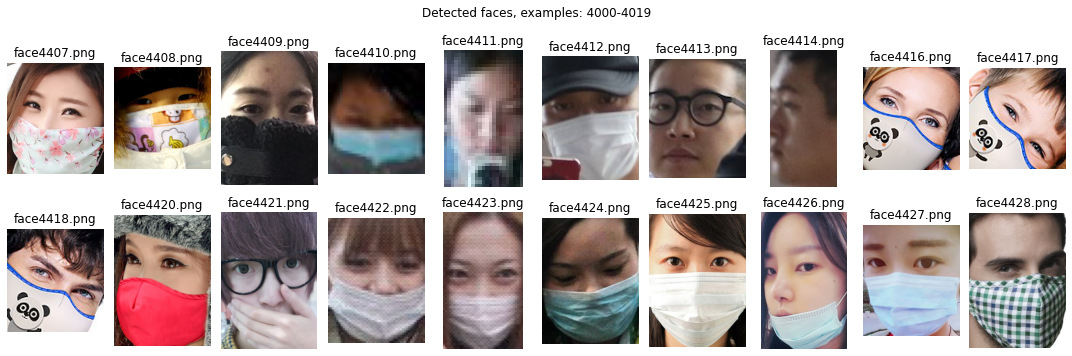

In [6]:
dfa.show_examples_20()

In [7]:
annotations = [[0,4], [0,3,9], [3], [0,3,4], [10], [0,9,10], [3,8], [], [0], [0,4],
               [0,4], [0,9], [4,6,8], [0,4], [0,4], [0,4], [0,4], [0,4], [0], [0]]
dfa.save_annotations(annotations)
dfa.next_batch()

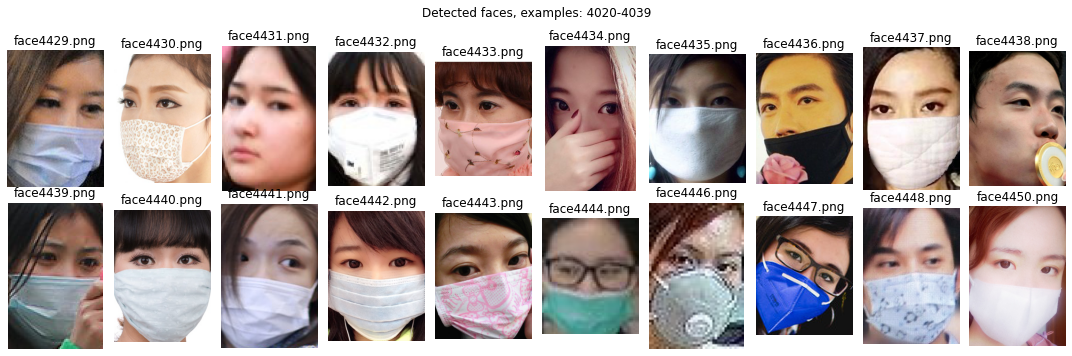

In [8]:
dfa.show_examples_20()

In [9]:
annotations = [[0,4], [0], [], [0,4], [0,4], [4,6], [0,4], [0,10], [0], [10],
               [0,4,6], [0,4], [0,4], [0,4], [0,4], [0,8], [0,4], [0,4,8], [0,4], [0,4]]
dfa.save_annotations(annotations)
dfa.next_batch()

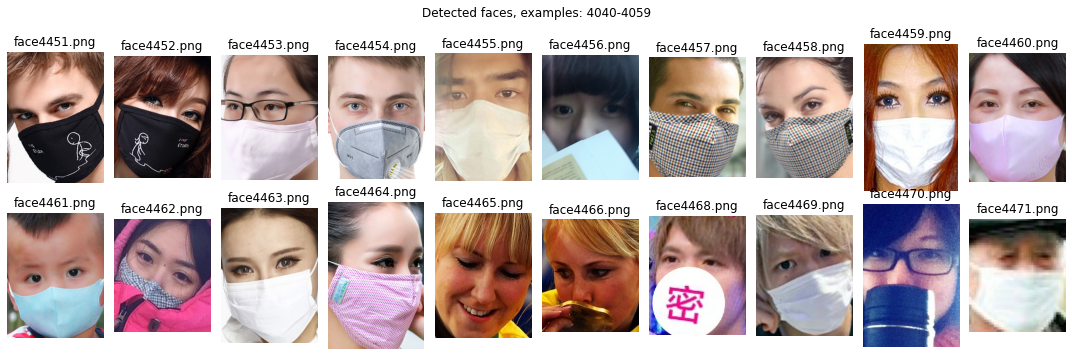

In [10]:
dfa.show_examples_20()

In [11]:
annotations = [[0,4], [0,4], [0,8], [0], [0,4], [4,10], [0], [0], [0,4], [0,4],
               [0], [0,3,4], [0], [0], [4], [4,6,10], [4,10], [0,4], [4,8,10], [0,9]]
dfa.save_annotations(annotations)
dfa.next_batch()